# <font color="#FF69B4">**Sentiment Analysis of Barbie movie reviews from IMDB**</font>


<img src="Img/barbie website.png" width="800" />

Note: Each time you run this notebook, you will get different updated datasets as the reviews keep adding up

**Link for oppenheimer sentiment analysis:** https://github.com/antojeffry/Oppenheimer-Sentiment-Analysis

**Scraping the reviews from the imdb website for Barbie movie**

Importing the librarires for web scraping

In [1]:
import time
import csv
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

In [2]:
# Set up Chrome WebDriver
driver = webdriver.Chrome()

url = "https://www.imdb.com/title/tt1517268/reviews?ref_=tt_urv"
driver.get(url)

**Since all the reviews are only seen when the load more button is clicked, we are going to automate the process using selenium ChromeWebdriver**

In [3]:
# Wait for the page to load and the "Load More" button to become clickable
wait = WebDriverWait(driver, 10)

# Scroll down the page and wait for new reviews to load
while True:
    try:
        load_more_button = wait.until(EC.element_to_be_clickable((By.CLASS_NAME, "ipl-load-more__button")))
        driver.execute_script("arguments[0].scrollIntoView();", load_more_button)
        load_more_button.click()
        time.sleep(2)  # Allow time for new reviews to load
    except Exception:
        break

# Extract all the reviews
reviews = driver.find_elements(By.CSS_SELECTOR, ".lister-item-content .text.show-more__control")

# Save the reviews to a CSV file
with open("Barbie_reviews.csv", mode="w", encoding="utf-8", newline="") as file:
    writer = csv.writer(file)
    writer.writerow(["Review"])

    for review in reviews:
        review_text = review.text.strip()
        writer.writerow([review_text])

driver.quit()

Importing libraries for Sentiment analysis

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

In [5]:
df = pd.read_csv("Barbie_reviews.csv")
df.head(10)

,Review
0,I'm just going to get straight to the point: I...
1,"Margot does the best with what she's given, bu..."
2,The first thing you need to know about Barbie ...
3,NaN
4,"Wow, this movie was a love letter to cinema. F..."
5,NaN
6,"8.5/10 While i'm not so sure at first, the mov..."
7,"Barbie begins in an irresistible way, as a fun..."
8,"It pains me to say it, but I enjoyed this movi..."
9,NaN


In [6]:
df.shape

(874, 1)

In [7]:
df.isnull().sum()

Review    212
dtype: int64

These 212 reviews were redacted by the users because it had spoilers. We can just remove those

**Removing null values**

In [8]:
df=df.dropna()

In [9]:
df.isnull().sum()

Review    0
dtype: int64

In [10]:
df.shape

(662, 1)

In [11]:
dup=df.duplicated()
print(df[dup])

Empty DataFrame
Columns: [Review]
Index: []


So there are no duplicates

In [12]:
def clean_review(review):
    review = review.replace('\n', ' ')   # Remove newline characters
    review = review.replace('\\', '')    # Remove backslash characters
    review = review.replace('\'', '')    # Remove single quotes
    return review

df['Review'] = df['Review'].apply(clean_review)

In [13]:
example = df['Review'][8]
example

'It pains me to say it, but I enjoyed this movie so much more then I was expecting to, musical numbers, humour, there truly is something for the whole family yo enjoy.  Bright, garish and somewhat kitsch, those were my expectations, and sure its a veritable cornucopia of glitter and rainbows, but what I wasnt expecting, was for the film to be so engaging, theres actually some real depth that I wasnt expecting. That opening introduction, that came as a major surprise, and pretty much set the tone.  Of course there are plenty of double entendres, laughs that adults will enjoy, kids will no doubt chuckle away too.  Im pretty sure this film is going to win awards for its production, its very well made, creative design and visuals, a lot of thought has gone into this. Greta Gerwig did a great job.  Margot Robbie is glorious as Barbie, Ryan Gosling was great I thought. The pair shared some terrific scenes, real chemistry, and plenty of cutting one liners.  Great use of music, everything fitt

**Now, the text are way better for sentiment analysis**

# Vader model

In [14]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()

# Note

**If the SentimentIntensityAnalyzer() is not working, use the below code, otherwise no need to run this code**

In [ ]:
import nltk
import ssl

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context

nltk.download()

In [15]:
example=df["Review"][8]

In [16]:
sia.polarity_scores(example)

{'neg': 0.038, 'neu': 0.558, 'pos': 0.404, 'compound': 0.9986}

**Wow the sentiment of the review by the vader model is good,the compound is near to +1, therefore the review is positive**

In [17]:
compound_scores = []
positive_scores = []
negative_scores = []
neutral_scores = []

# Iterate through the DataFrame and calculate polarity scores
for i, row in tqdm(df.iterrows(), total=len(df)):
    text = row['Review']
    scores = sia.polarity_scores(text)
    compound_scores.append(scores['compound'])
    positive_scores.append(scores['pos'])
    negative_scores.append(scores['neg'])
    neutral_scores.append(scores['neu'])

df['V_Compound_Score'] = compound_scores
df['V_Positive_Score'] = positive_scores
df['V_Negative_Score'] = negative_scores
df['V_Neutral_Score'] = neutral_scores

  0%|          | 0/662 [00:00<?, ?it/s]

Run the below cell individually to see how well the vader model performs 

In [33]:
df["Review"][799]

'The marketing for this movie was incredible, so are actors and the whole setting. Not only does that attract a massive audience, but also seeing the famous doll many grew up with. Unfortunately, once I got into my theather seat the hype begin to wear drown. I can not wrap my mind around all the positive reviews on the script and Greta because the plot of this movie is full of major gaps and unreached points. It dives into politics but can not decide what to do with it so instead runs a couple of pointless monolouges that bring no value or add to the conclusion of the movie whatsoever. Not to mention I found myself consistently unsure of what is happening and why. This movie presents itself as a comedy and the audience was dead quiet throught the whole thing! Kudos to Ryan Gosling whose acting skills might be the highlight of this whole experience even when Ken as a charachter made little to no sense. All this amazing cast and promotion might have been too big of a bite for the directo

By running the cell above with the indexes you want from the model results given below. The sentiment of the reviews are spot on

In [34]:
df.tail(10)

,Review,V_Compound_Score,V_Positive_Score,V_Negative_Score,V_Neutral_Score
861,Barbie is not carrying any knowledgeable and i...,0.9322,0.147,0.063,0.790
862,"Its true, any other movie wouldve been better....",0.9751,0.226,0.027,0.747
863,"Ill preface by saying the movie is hilarious, ...",0.8279,0.145,0.093,0.763
864,"Really good soundtracks and amazing cast, Marg...",0.9744,0.261,0.053,0.686
866,If ur over 13 this movie will most definitely ...,-0.6637,0.155,0.184,0.661
867,Listen as a woman in her 20s I am all for femi...,-0.9274,0.114,0.187,0.699
868,Had so much more potential. This script was di...,-0.3894,0.132,0.129,0.739
869,The only reason this movie even gets a 2 from ...,0.7393,0.141,0.112,0.747
871,"Im NOT a Barbie girl in NOT the Barbie World, ...",0.4098,0.095,0.074,0.831
873,Too many sexual references and doesnt grasp th...,-0.5793,0.050,0.070,0.880


# Textblob model

In [35]:
from textblob import TextBlob
from tqdm.notebook import tqdm

textblob_scores = []

for i, row in tqdm(df.iterrows(), total=len(df)):
    text = row['Review']
    blob = TextBlob(text)
    textblob_scores.append(blob.sentiment.polarity)

df['TextBlob_Score'] = textblob_scores

  0%|          | 0/662 [00:00<?, ?it/s]

In [36]:
df.head(10)

,Review,V_Compound_Score,V_Positive_Score,V_Negative_Score,V_Neutral_Score,TextBlob_Score
0,Im just going to get straight to the point: I ...,0.8043,0.158,0.113,0.729,0.122956
1,"Margot does the best with what shes given, but...",0.9235,0.200,0.127,0.674,0.103083
2,The first thing you need to know about Barbie ...,0.9959,0.179,0.066,0.755,0.197491
4,"Wow, this movie was a love letter to cinema. F...",0.9629,0.171,0.080,0.749,0.101641
6,"8.5/10 While im not so sure at first, the movi...",0.9987,0.329,0.040,0.632,0.323642
7,"Barbie begins in an irresistible way, as a fun...",0.6486,0.140,0.078,0.782,0.232500
8,"It pains me to say it, but I enjoyed this movi...",0.9986,0.404,0.038,0.558,0.329327
10,"I was honestly doubting this movie at first, b...",0.9970,0.350,0.022,0.628,0.469345
13,Wow. I did not see this masterpiece coming. An...,0.9945,0.246,0.040,0.714,0.121222
14,I got free tickets for a preview and to be hon...,0.9919,0.198,0.024,0.777,0.264732


**We can clearly see that textblob does not do well**

# Flair model

In [37]:
from flair.models import TextClassifier
from flair.data import Sentence
from tqdm.notebook import tqdm

# Load the pre-trained Flair sentiment analysis model
classifier = TextClassifier.load('en-sentiment')

flair_scores = []

for i, row in tqdm(df.iterrows(), total=len(df)):
    text = row['Review']
    sentence = Sentence(text)
    classifier.predict(sentence)
    flair_scores.append(sentence.labels[0].score)

df['Flair_Score'] = flair_scores

  0%|          | 0/662 [00:00<?, ?it/s]

In [38]:
df.head(10)

,Review,V_Compound_Score,V_Positive_Score,V_Negative_Score,V_Neutral_Score,TextBlob_Score,Flair_Score
0,Im just going to get straight to the point: I ...,0.8043,0.158,0.113,0.729,0.122956,0.999990
1,"Margot does the best with what shes given, but...",0.9235,0.200,0.127,0.674,0.103083,0.999991
2,The first thing you need to know about Barbie ...,0.9959,0.179,0.066,0.755,0.197491,0.987642
4,"Wow, this movie was a love letter to cinema. F...",0.9629,0.171,0.080,0.749,0.101641,0.924516
6,"8.5/10 While im not so sure at first, the movi...",0.9987,0.329,0.040,0.632,0.323642,0.999972
7,"Barbie begins in an irresistible way, as a fun...",0.6486,0.140,0.078,0.782,0.232500,0.999312
8,"It pains me to say it, but I enjoyed this movi...",0.9986,0.404,0.038,0.558,0.329327,0.999911
10,"I was honestly doubting this movie at first, b...",0.9970,0.350,0.022,0.628,0.469345,0.999982
13,Wow. I did not see this masterpiece coming. An...,0.9945,0.246,0.040,0.714,0.121222,0.999980
14,I got free tickets for a preview and to be hon...,0.9919,0.198,0.024,0.777,0.264732,0.999970


**The Flair model performance is even worse than textblob**

**Therefore we can see that the vader model is the one which performs well, So we will use the vader model**

In [39]:
df.columns

Index(['Review', 'V_Compound_Score', 'V_Positive_Score', 'V_Negative_Score',
       'V_Neutral_Score', 'TextBlob_Score', 'Flair_Score'],
      dtype='object')

In [40]:
df=df.drop(columns=['V_Positive_Score', 'V_Negative_Score',
       'V_Neutral_Score', 'TextBlob_Score', 'Flair_Score'])

In [41]:
df.head()

,Review,V_Compound_Score
0,Im just going to get straight to the point: I ...,0.8043
1,"Margot does the best with what shes given, but...",0.9235
2,The first thing you need to know about Barbie ...,0.9959
4,"Wow, this movie was a love letter to cinema. F...",0.9629
6,"8.5/10 While im not so sure at first, the movi...",0.9987


In [42]:
#Let's rename the column name as Sentiment
df=df.rename({'V_Compound_Score':'Sentiment'},axis=1)
df

,Review,Sentiment
0,Im just going to get straight to the point: I ...,0.8043
1,"Margot does the best with what shes given, but...",0.9235
2,The first thing you need to know about Barbie ...,0.9959
4,"Wow, this movie was a love letter to cinema. F...",0.9629
6,"8.5/10 While im not so sure at first, the movi...",0.9987
...,...,...
867,Listen as a woman in her 20s I am all for femi...,-0.9274
868,Had so much more potential. This script was di...,-0.3894
869,The only reason this movie even gets a 2 from ...,0.7393
871,"Im NOT a Barbie girl in NOT the Barbie World, ...",0.4098


In [43]:
def sentiment(label):
    if label <0.5:
        return "Negative"
    elif 0.5 <= label <= 0.72:
        return "Neutral"
    elif label>0.72:
        return "Positive"

In [44]:
df['Sentiment'] = df['Sentiment'].apply(sentiment)

In [54]:
df.head(10)

,Review,Sentiment
0,Im just going to get straight to the point: I ...,Positive
1,"Margot does the best with what shes given, but...",Positive
2,The first thing you need to know about Barbie ...,Positive
4,"Wow, this movie was a love letter to cinema. F...",Positive
6,"8.5/10 While im not so sure at first, the movi...",Positive
7,"Barbie begins in an irresistible way, as a fun...",Neutral
8,"It pains me to say it, but I enjoyed this movi...",Positive
10,"I was honestly doubting this movie at first, b...",Positive
13,Wow. I did not see this masterpiece coming. An...,Positive
14,I got free tickets for a preview and to be hon...,Positive


Yes, Finally done but we can see that in rare cases, the model doesn't predict the sentiment properly

In [46]:
df[df["Sentiment"]=="Neutral"]

,Review,Sentiment
7,"Barbie begins in an irresistible way, as a fun...",Neutral
29,So I went into the movie with little to no exp...,Neutral
53,The brilliant marketing is what led us tonight...,Neutral
72,I really wanted to enjoy this and I know that ...,Neutral
83,I wanted to love this movie but it just wasnt ...,Neutral
93,My wife and I did the double feature of Barbie...,Neutral
228,"Granted, my experience of Barbie may have been...",Neutral
352,"Barbie is a curious film, and I believe that t...",Neutral
357,I expected this movie to be more lighthearted ...,Neutral
378,"Wow, this was really bad. Here is the truth. I...",Neutral


In [52]:
df["Review"][705]

'This thought-provoking movie is definitely not geared towards children or exclusively for girls; its a must-watch for audiences of all backgrounds. It addresses delicate and fragile topics with precision. It was surprising and totally unexpected. Admittedly, the first half an hour is hard to get through, but you really get into it once you get the idea and youre totally consumed in it and already questioning yourself and the society before you realise. However, they could have concluded it better by finding a middle ground or presenting a solution to the problems addressed. Nevertheless, its overall impact makes it a must-see for everyone.'

**Wow, the vader model used is pretty good, the sentiments are on point except a very few**

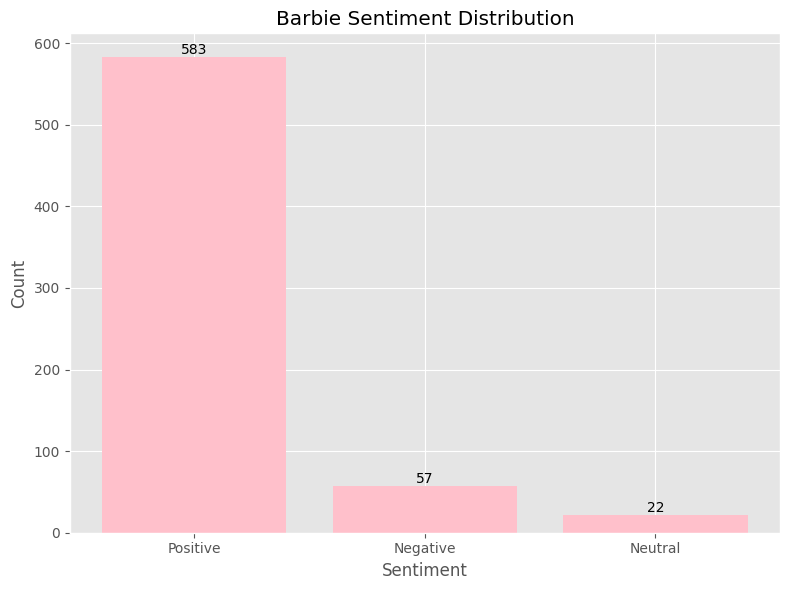

In [53]:
import matplotlib.pyplot as plt


value_counts = df['Sentiment'].value_counts()

plt.figure(figsize=(8, 6))
bars = plt.bar(value_counts.index, value_counts.values, color='pink')

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, str(height), ha='center', va='bottom')

plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Barbie Sentiment Distribution')
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()


In this bar chart, we can see that the movie **"Barbie"** have more **Postive** reviews